# Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, models, utils, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten, BatchNormalization, Activation, Dense, Dropout
import matplotlib.pyplot as plt

# Loading dataset
trouwens best wel makkelijk dat het al zo is opgesplits in een train en test set

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Data exploration
Als eerste de shapes van de data:

In [3]:
print(f"input image shape: {X_train.shape}")
print(f"targets shape: {y_train.shape}")

input image shape: (50000, 32, 32, 3)
targets shape: (50000, 1)


Laten we de input plaatjes ook maar eens tekenen:

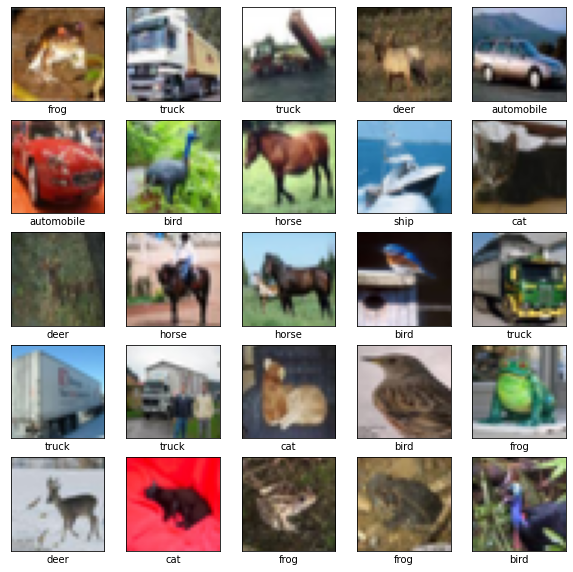

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


# Data preparation
Als eerste normalizeren we de pixels zodat ze tussen 0.0 en 1.0 komen te liggen, in plaats van 0 to 255

In [5]:
X_train, X_test = X_train / 255.0, X_test / 255.0

En de targets staan nu nog met een index maar dat moeten we omzetten naar one-hot vectors omdat het categoriën zijn

In [6]:
n_classes = 10
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)

# Modelling
Omdat we wel vaker het model opnieuw willen aanmaken lijkt het me handig om hier een functie van te maken

In [7]:
def create_model():
    model = Sequential()

    # Convolution Layer 1
    model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32,32,3)))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))

    # Convolution Layer 2
    model.add(Conv2D(32, (3, 3)))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Convolution Layer 3
    model.add(Conv2D(64,(3, 3)))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))

    # Convolution Layer 4
    model.add(Conv2D(64, (3, 3)))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())

    # Fully Connected Layer 5
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    # Fully Connected Layer 6                       
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    return model

Ik heb inspiratie genomen van`Les_10_Convolutionele_neurale_netewerken_MNIST.ipynb`.  

De eerste vier lagen zijn convolutionaire lagen en de laatste twee zijn de al eerder gebruikte fully-connected lagen.  
Ik gebruik de ReLU als activatie op elke laag.
De batchnormalization is om de gewichten te normalizeren.

Het netwerk wordt eerst breder om meer eigenschappen uit de afbeelding te halen en neemt daarna in de fully-connected layers weer af om naar de categorie output te gaan met een lengte van 10.

De dropout is om overfitting en uitschieters tegen te gaan.

In [8]:
model1 = create_model()
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0

## Compile
Ik gebruik de adam optimezer

In [9]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training

In [10]:
history = model1.fit(X_train, Y_train, batch_size = 50, epochs=10, verbose=1, validation_split = 0.2)

Epoch 1/10
800/800 [==============================] - 6s 6ms/step - loss: 1.5418 - accuracy: 0.4666 - val_loss: 1.1072 - val_accuracy: 0.6126
Epoch 2/10
800/800 [==============================] - 4s 5ms/step - loss: 0.8849 - accuracy: 0.6878 - val_loss: 0.9802 - val_accuracy: 0.6618
Epoch 3/10
800/800 [==============================] - 4s 6ms/step - loss: 0.6940 - accuracy: 0.7567 - val_loss: 1.0703 - val_accuracy: 0.6486
Epoch 4/10
800/800 [==============================] - 4s 5ms/step - loss: 0.5673 - accuracy: 0.8060 - val_loss: 1.0664 - val_accuracy: 0.6571
Epoch 5/10
800/800 [==============================] - 4s 5ms/step - loss: 0.4628 - accuracy: 0.8390 - val_loss: 0.7736 - val_accuracy: 0.7420
Epoch 6/10
800/800 [==============================] - 4s 6ms/step - loss: 0.3740 - accuracy: 0.8725 - val_loss: 0.8788 - val_accuracy: 0.7234
Epoch 7/10
800/800 [==============================] - 4s 5ms/step - loss: 0.3145 - accuracy: 0.8917 - val_loss: 0.8665 - val_accuracy: 0.7326
Epoch 

# History
Om beter inzicht te krijgen plotten we de history tijdens het trainen,  
en omdat ik dit vaker ga doen maak ik er nu maar alvast een functie van

In [11]:
def plot_history(history):
    fig, axs = plt.subplots(2)
    
    fig.legend(['train', 'test'])
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('model accuracy')
    axs[0].set_ylabel('accuracy')
    
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('model loss')
    axs[1].set_ylabel('loss')
    axs[1].set_xlabel('epoch')
    
    fig.legend(['train', 'test'])
    plt.show()

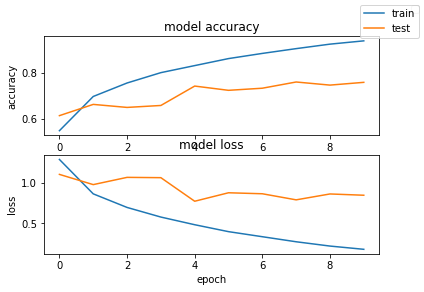

In [12]:
plot_history(history)

En de evaluatie op de test set

In [13]:
loss, accuracy = model1.evaluate(X_test, Y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.8838 - accuracy: 0.7501
Test loss: 0.8838
Test accuracy: 0.7501


Hmmm, niet slecht maar ik denk dat we nog wel wat kunnen optimalizeren bij het overfitten, want dat zie ik toch best veel in de grafiek hierboven gebreuren.

Dit kunnen we aanpakken met:
# Data augmentation

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Aanmaken van de image generator

In [15]:
datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=15,
    width_shift_range=3/32,
    height_shift_range=3/32,
    zoom_range=[0.9, 1.1]
)
batch_size = 64
train_generator = datagen.flow(X_train, Y_train, batch_size=batch_size)

Het model maken, compilen en fitten

Deze keer heb ik het aantal epochs omhoog gedaan, omdat overfitten minder en ding zal zijn, maar dat zullen we terug zien in de grafiek.

EDIT: ik heb het ook hoger gemaakt na het zien van de grafiek

In [16]:
model2 = create_model()
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model2.fit(train_generator, batch_size=batch_size, epochs=40, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/40
782/782 [==============================] - 16s 20ms/step - loss: 1.6151 - accuracy: 0.4352 - val_loss: 1.4453 - val_accuracy: 0.5204
Epoch 2/40
782/782 [==============================] - 16s 20ms/step - loss: 1.0480 - accuracy: 0.6289 - val_loss: 1.0404 - val_accuracy: 0.6506
Epoch 3/40
782/782 [==============================] - 15s 19ms/step - loss: 0.8851 - accuracy: 0.6871 - val_loss: 0.9410 - val_accuracy: 0.6700
Epoch 4/40
782/782 [==============================] - 15s 19ms/step - loss: 0.8098 - accuracy: 0.7171 - val_loss: 0.8019 - val_accuracy: 0.7226
Epoch 5/40
782/782 [==============================] - 15s 20ms/step - loss: 0.7557 - accuracy: 0.7358 - val_loss: 0.9348 - val_accuracy: 0.6771
Epoch 6/40
782/782 [==============================] - 15s 19ms/step - loss: 0.7096 - accuracy: 0.7507 - val_loss: 0.9491 - val_accuracy: 0.6930
Epoch 7/40
782/782 [==============================] - 15s 19ms/step - loss: 0.6723 - accuracy: 0.7651 - val_loss: 0.6954 - val_accuracy:

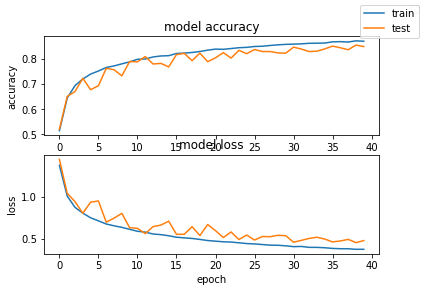

In [17]:
plot_history(history)

In [18]:
loss, accuracy = model2.evaluate(X_test, Y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

313/313 [==============================] - 0s 1ms/step - loss: 0.4754 - accuracy: 0.8483
Test loss: 0.4754
Test accuracy: 0.8483


# Conclusie
De augmented data zorgt voor nog best wel een performance boost.

Om globaler te kijken, CNN werkt best wel goed op deze dataset, hoewel voor sommige use cases dit soort accuracy nog niet genoeg is.
Maar je zou vast met nog wat andere technieken van onderdeel B van de opdracht kunnen toepassen en een nog veel beter presterend model krijgen.